In [1]:
%pip install pandas

import pandas as pd


  Using cached pandas-2.3.3-cp314-cp314-win_amd64.whl.metadata (19 kB)
  Using cached numpy-2.3.5-cp314-cp314-win_amd64.whl.metadata (60 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.3.3-cp314-cp314-win_amd64.whl (11.1 MB)
Using cached numpy-2.3.5-cp314-cp314-win_amd64.whl (12.9 MB)
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)

   ---------------------------------------- 0/4 [pytz]
   ---------------------------------------- 0/4 [pytz]
   ---------------------------------------- 0/4 [pytz]
   ---------- ----------------------------- 1/4 [tzdata]
   ---------- ----------------------------- 1/4 [tzdata]
   ---------- ----------------------------- 1/4 [tzdata]
   ---------- ----------------------------- 1/4 [tzdata]
   ---------- ----------------------------- 1/4 [tzdata]
   -------------------- ----------------


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:


# Load the dataset correctly
df = pd.read_csv(
    "../data/MachineLearningRating_v3.txt",
    sep="|",                      # pipe separator
    parse_dates=["TransactionMonth", "VehicleIntroDate"], 
    dayfirst=False,               # months likely first based on naming convention
    low_memory=False
)

# Show first few rows
df.head()


C:\Users\user\AppData\Local\Temp\ipykernel_6188\2391996280.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [11]:

# ============================================================
# 3. CHECK STRUCTURE & CLEAN DATA TYPES
# ============================================================

print("\n--- STRUCTURE ---")
df.info()

# Categorical columns
categorical_cols = [
    "IsVATRegistered","Citizenship","LegalType","Title","Language","Bank",
    "AccountType","MaritalStatus","Gender","Country","Province","PostalCode",
    "MainCrestaZone","SubCrestaZone","ItemType","mmcode","VehicleType","make",
    "Model","bodytype","NumberOfDoors","AlarmImmobiliser","TrackingDevice",
    "NewVehicle","WrittenOff","Rebuilt","Converted","CrossBorder",
    "TermFrequency","ExcessSelected","CoverCategory","CoverType","CoverGroup",
    "Section","Product","StatutoryClass","StatutoryRiskType"
]

for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].astype("category")

# Numeric columns
numeric_cols = [
    "RegistrationYear","Cylinders","cubiccapacity","kilowatts",
    "CustomValueEstimate","CapitalOutstanding","NumberOfVehiclesInFleet",
    "SumInsured","CalculatedPremiumPerTerm","TotalPremium","TotalClaims"
]

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Dates
date_cols = ["TransactionMonth", "VehicleIntroDate"]
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors="coerce")

print("\n--- Cleaned dtypes ---")
df.dtypes



--- STRUCTURE ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype         
---  ------                    --------------    -----         
 0   UnderwrittenCoverID       1000098 non-null  int64         
 1   PolicyID                  1000098 non-null  int64         
 2   TransactionMonth          1000098 non-null  datetime64[ns]
 3   IsVATRegistered           1000098 non-null  bool          
 4   Citizenship               1000098 non-null  object        
 5   LegalType                 1000098 non-null  object        
 6   Title                     1000098 non-null  object        
 7   Language                  1000098 non-null  object        
 8   Bank                      854137 non-null   object        
 9   AccountType               959866 non-null   object        
 10  MaritalStatus             991839 non-null   object        
 11  Gender                    99056

UnderwrittenCoverID                  int64
PolicyID                             int64
TransactionMonth            datetime64[ns]
IsVATRegistered                   category
Citizenship                       category
LegalType                         category
Title                             category
Language                          category
Bank                              category
AccountType                       category
MaritalStatus                     category
Gender                            category
Country                           category
Province                          category
PostalCode                        category
MainCrestaZone                    category
SubCrestaZone                     category
ItemType                          category
mmcode                            category
VehicleType                       category
RegistrationYear                     int64
make                              category
Model                             category
Cylinders  

In [12]:
df['Province'] = df['Province'].astype('category')
df['Gender'] = df['Gender'].astype('category')


In [13]:
meta = pd.DataFrame({
    'dtype': df.dtypes.astype(str),
    'missing_pct': df.isna().mean()*100
})
meta.to_csv("metadata_summary.csv")


In [14]:
# ============================================================
# 4. DATA QUALITY CHECK
# ============================================================

print("\n--- Missing Values ---")
print(df.isnull().sum())

print("\n--- Summary Statistics ---")
df.describe(include="all")



--- Missing Values ---
UnderwrittenCoverID               0
PolicyID                          0
TransactionMonth                  0
IsVATRegistered                   0
Citizenship                       0
LegalType                         0
Title                             0
Language                          0
Bank                         145961
AccountType                   40232
MaritalStatus                  8259
Gender                         9536
Country                           0
Province                          0
PostalCode                        0
MainCrestaZone                    0
SubCrestaZone                     0
ItemType                          0
mmcode                          552
VehicleType                     552
RegistrationYear                  0
make                            552
Model                           552
Cylinders                       552
cubiccapacity                   552
kilowatts                       552
bodytype                        552
Numb

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
count,1.000098e+06,1.000098e+06,1000098,1000098,1000098,1000098,1000098,1000098,854137,959866,...,1000098,1000098,1000098,1000098,1000098,1000098,1000098,1000098,1.000098e+06,1.000098e+06
unique,NaN,NaN,NaN,2,4,6,5,1,11,3,...,13,28,22,14,5,4,1,1,NaN,NaN
top,NaN,NaN,NaN,False,,Individual,Mr,English,First National Bank,Current account,...,No excess,Passenger Liability,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,NaN,NaN
freq,NaN,NaN,NaN,995075,895210,911929,933555,1000098,260811,597938,...,791235,104158,104183,824124,828125,915028,1000098,1000098,NaN,NaN
mean,1.048175e+05,7.956682e+03,2015-02-28 10:49:29.147423744,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.190550e+01,6.486119e+01
min,1.000000e+00,1.400000e+01,2013-10-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-7.825768e+02,-1.200241e+04
25%,5.514300e+04,4.500000e+03,2015-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00
50%,9.408300e+04,7.071000e+03,2015-04-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.178333e+00,0.000000e+00
75%,1.391900e+05,1.107700e+04,2015-06-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.192982e+01,0.000000e+00
max,3.011750e+05,2.324600e+04,2015-08-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.528260e+04,3.930921e+05


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


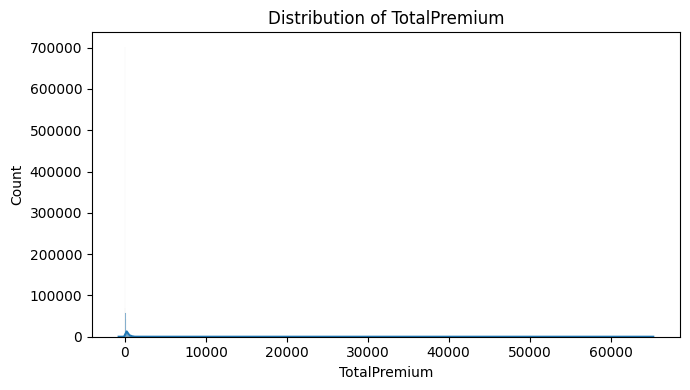

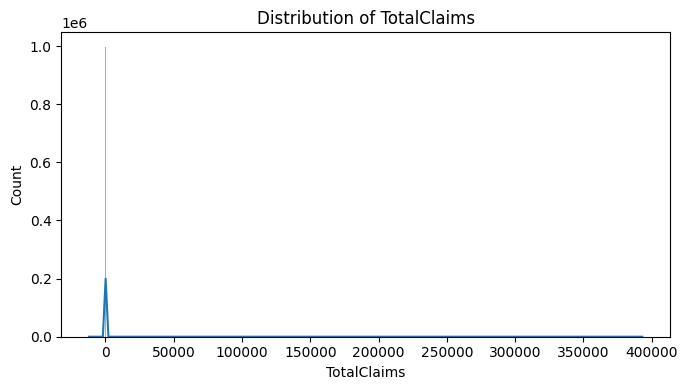

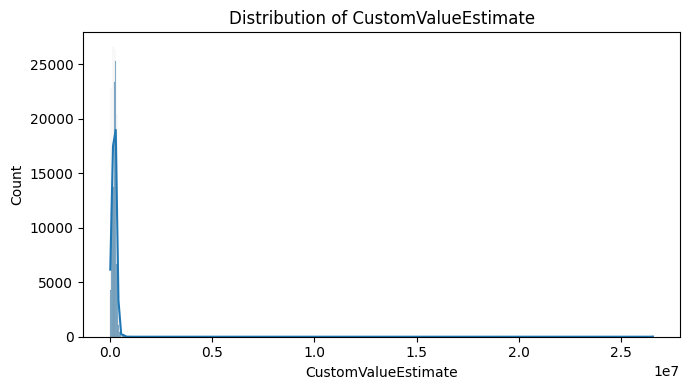

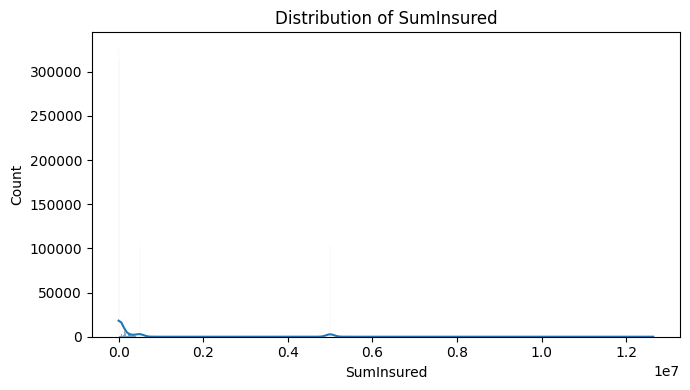

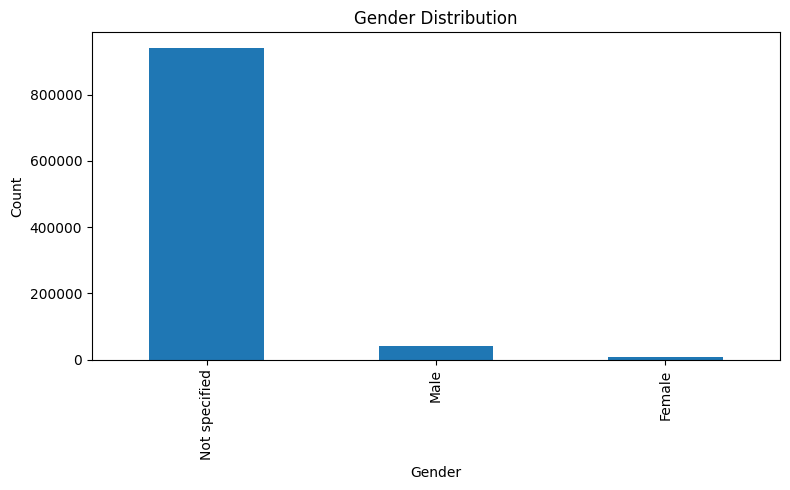

In [15]:
# ============================================================
# 5. UNIVARIATE ANALYSIS
# ============================================================

# Numerical distribution plots
%pip install matplotlib seaborn

import matplotlib.pyplot as plt
import seaborn as sns

num_vars = ["TotalPremium", "TotalClaims", "CustomValueEstimate", "SumInsured"]

for col in num_vars:
    plt.figure(figsize=(7,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.tight_layout()
    plt.show()

# Categorical distribution
plt.figure(figsize=(8,5))
df["Gender"].value_counts().plot(kind="bar")
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_6188\329702313.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(col)["LossRatio"].mean().sort_values().plot(kind="bar")
c:\Users\user\Desktop\Week-3\venv\Lib\site-packages\matplotlib\transforms.py:2437: RuntimeWarning: invalid value encountered in dot
  return Affine2D(np.dot(self._b.get_affine().get_matrix(),
c:\Users\user\Desktop\Week-3\venv\Lib\site-packages\matplotlib\transforms.py:2437: RuntimeWarning: invalid value encountered in dot
  return Affine2D(np.dot(self._b.get_affine().get_matrix(),


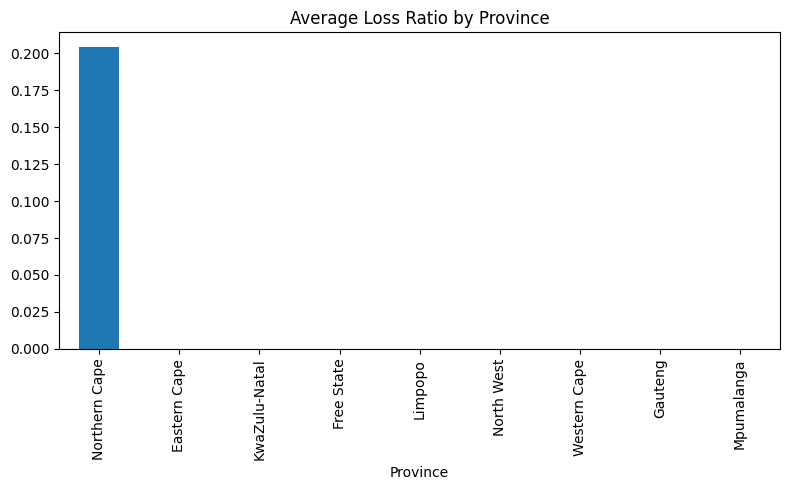

C:\Users\user\AppData\Local\Temp\ipykernel_6188\329702313.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(col)["LossRatio"].mean().sort_values().plot(kind="bar")
c:\Users\user\Desktop\Week-3\venv\Lib\site-packages\matplotlib\transforms.py:2437: RuntimeWarning: invalid value encountered in dot
  return Affine2D(np.dot(self._b.get_affine().get_matrix(),
c:\Users\user\Desktop\Week-3\venv\Lib\site-packages\matplotlib\transforms.py:2437: RuntimeWarning: invalid value encountered in dot
  return Affine2D(np.dot(self._b.get_affine().get_matrix(),


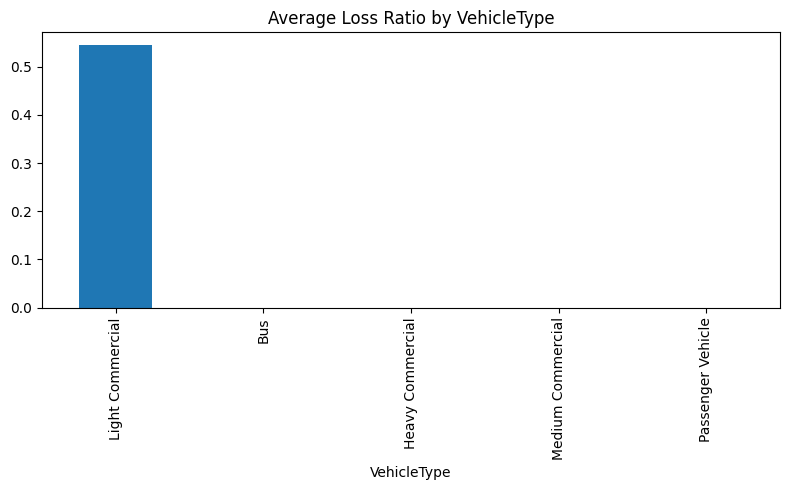

C:\Users\user\AppData\Local\Temp\ipykernel_6188\329702313.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(col)["LossRatio"].mean().sort_values().plot(kind="bar")
c:\Users\user\Desktop\Week-3\venv\Lib\site-packages\matplotlib\transforms.py:2437: RuntimeWarning: invalid value encountered in dot
  return Affine2D(np.dot(self._b.get_affine().get_matrix(),
c:\Users\user\Desktop\Week-3\venv\Lib\site-packages\matplotlib\transforms.py:2437: RuntimeWarning: invalid value encountered in dot
  return Affine2D(np.dot(self._b.get_affine().get_matrix(),


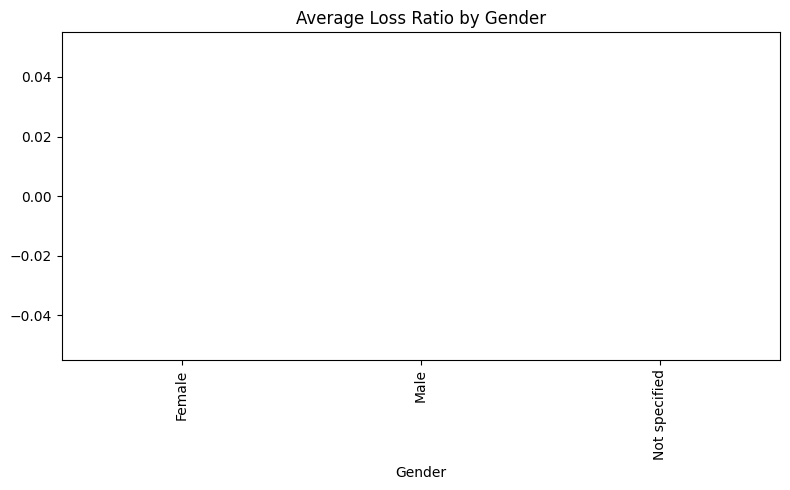

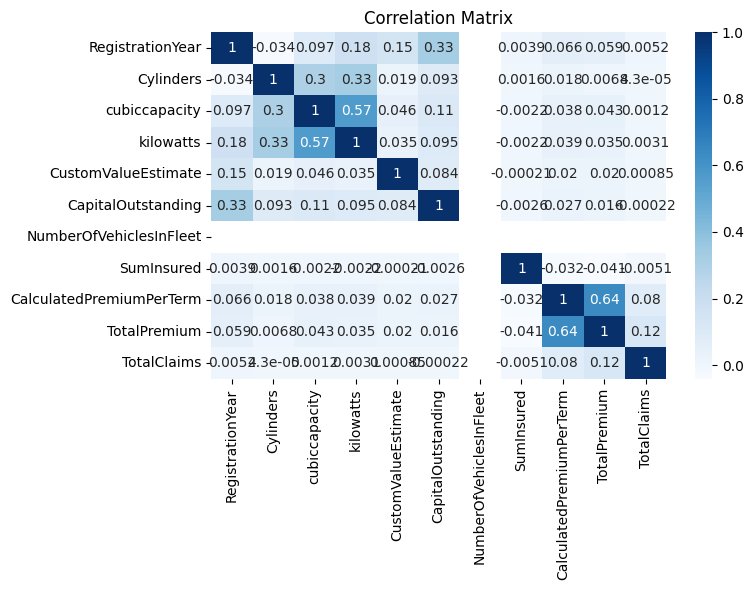

C:\Users\user\AppData\Local\Temp\ipykernel_6188\329702313.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_6188\329702313.py:28: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()
c:\Users\user\Desktop\Week-3\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


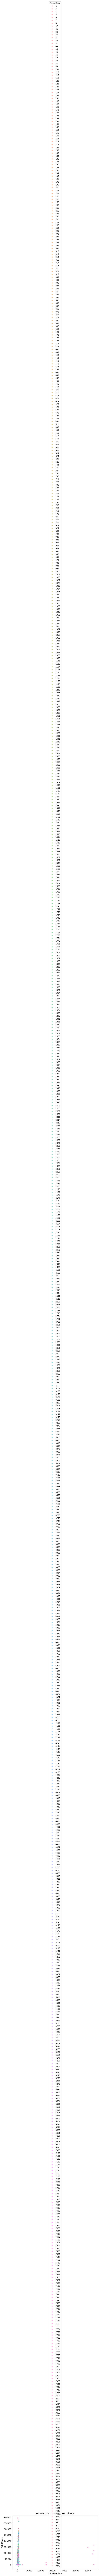

In [16]:
# ============================================================
# 6. BIVARIATE ANALYSIS
# ============================================================

# Loss Ratio by Province, VehicleType, Gender
df["LossRatio"] = df["TotalClaims"] / df["TotalPremium"]

group_cols = ["Province", "VehicleType", "Gender"]

for col in group_cols:
    plt.figure(figsize=(8,5))
    df.groupby(col)["LossRatio"].mean().sort_values().plot(kind="bar")
    plt.title(f"Average Loss Ratio by {col}")
    plt.tight_layout()
    plt.show()

# Correlation matrix for financials
plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="Blues")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

# Premium vs Claims by ZipCode (PostalCode)
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="TotalPremium", y="TotalClaims", hue="PostalCode", alpha=0.5)
plt.title("Premium vs Claims by PostalCode")
plt.tight_layout()
plt.show()


<Figure size 1000x500 with 0 Axes>

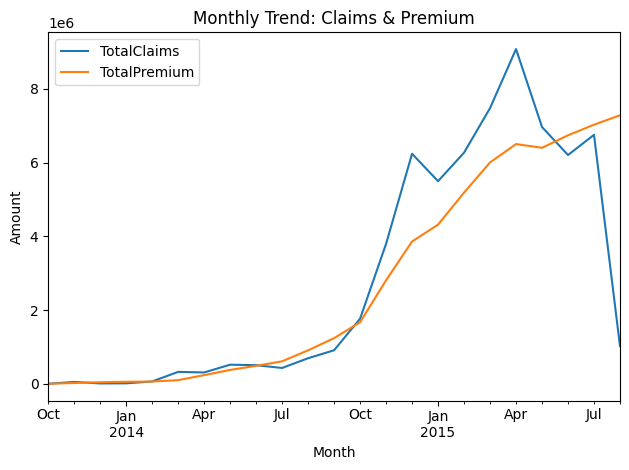

In [17]:
# ============================================================
# 7. TEMPORAL ANALYSIS
# ============================================================

df["Month"] = df["TransactionMonth"].dt.to_period("M")

monthly_trend = df.groupby("Month")[["TotalClaims","TotalPremium"]].sum()

plt.figure(figsize=(10,5))
monthly_trend.plot()
plt.title("Monthly Trend: Claims & Premium")
plt.xlabel("Month")
plt.ylabel("Amount")
plt.tight_layout()
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_6188\2201738405.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  make_claims = df.groupby("make")["TotalClaims"].mean().sort_values()


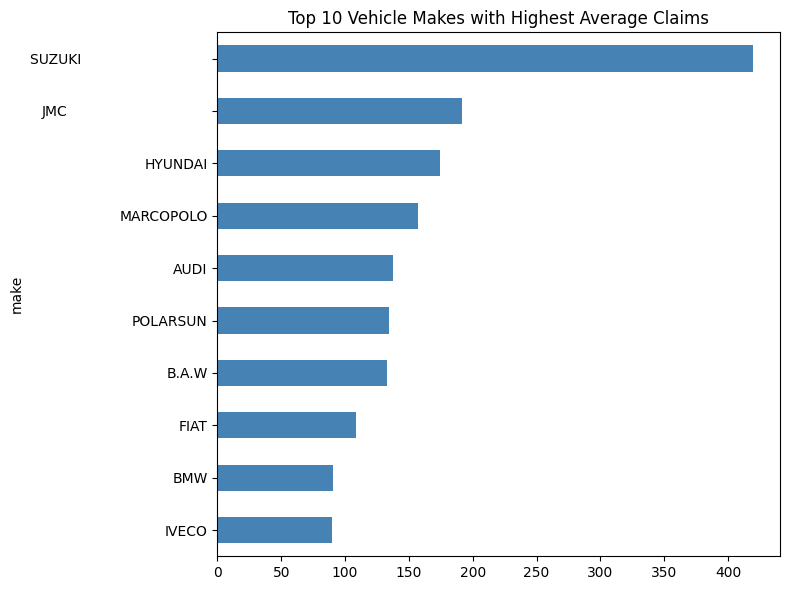

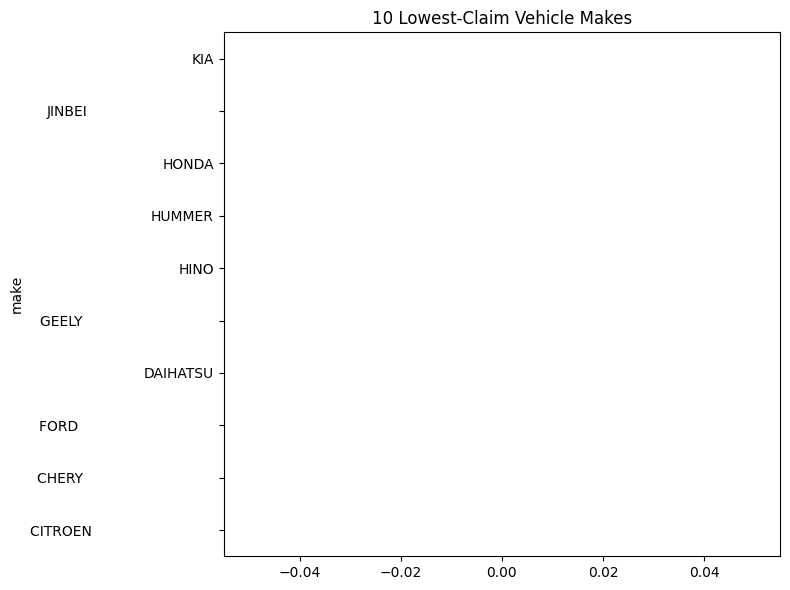

In [18]:
# ============================================================
# 8. TOP/BOTTOM MAKES & MODELS
# ============================================================

make_claims = df.groupby("make")["TotalClaims"].mean().sort_values()

plt.figure(figsize=(8,6))
make_claims.tail(10).plot(kind="barh", color="steelblue")
plt.title("Top 10 Vehicle Makes with Highest Average Claims")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,6))
make_claims.head(10).plot(kind="barh", color="olive")
plt.title("10 Lowest-Claim Vehicle Makes")
plt.tight_layout()
plt.show()

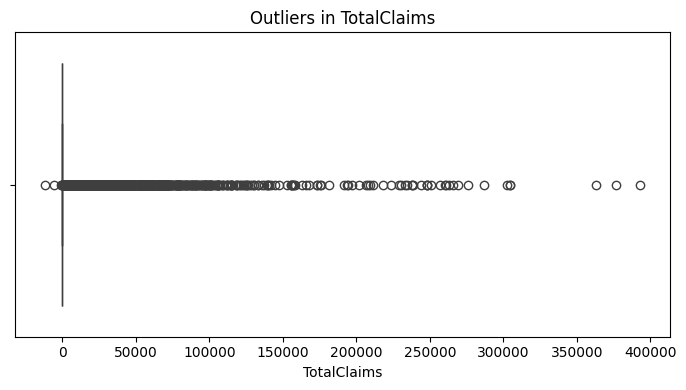

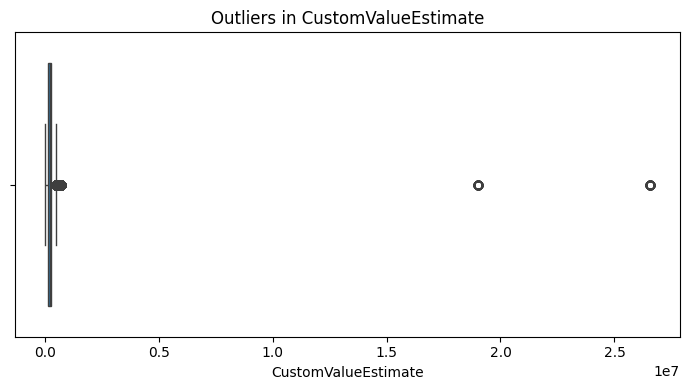

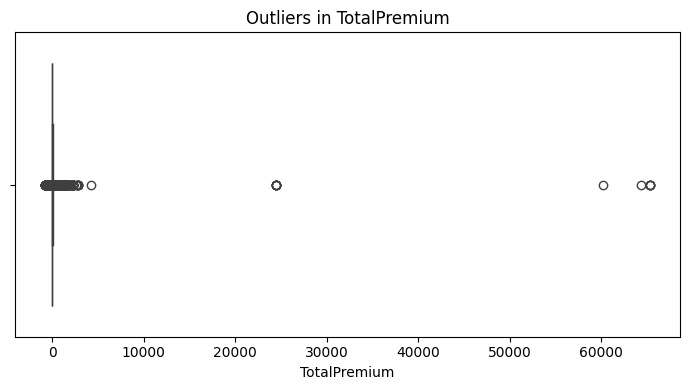

In [19]:
# ============================================================
# 9. OUTLIER DETECTION
# ============================================================

for col in ["TotalClaims", "CustomValueEstimate", "TotalPremium"]:
    plt.figure(figsize=(7,4))
    sns.boxplot(x=df[col])
    plt.title(f"Outliers in {col}")
    plt.tight_layout()
    plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_6188\3214784615.py:8: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_heatmap = df.pivot_table(


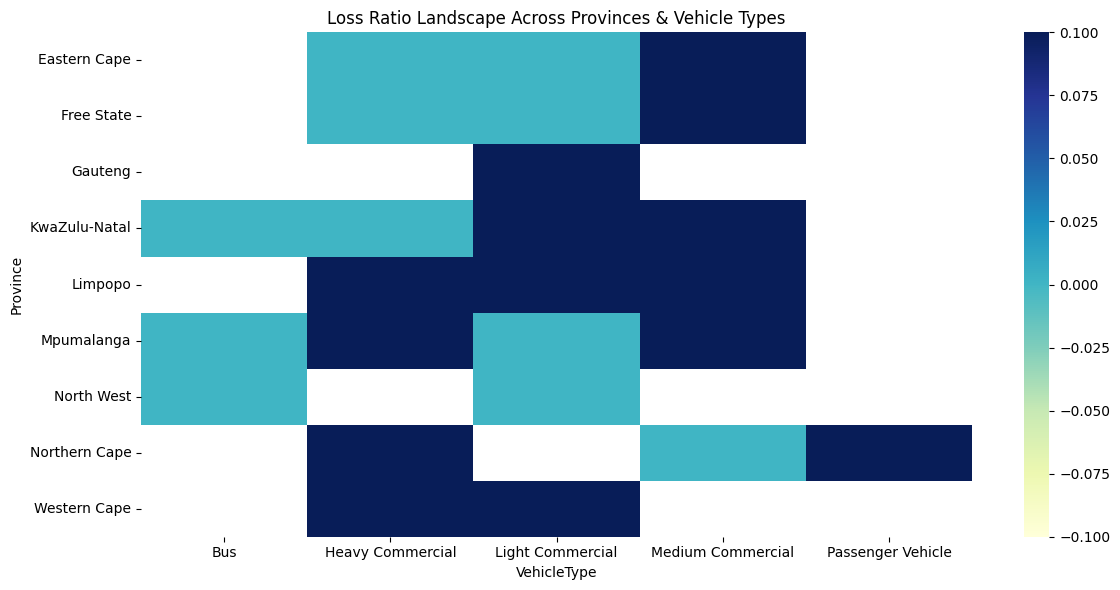

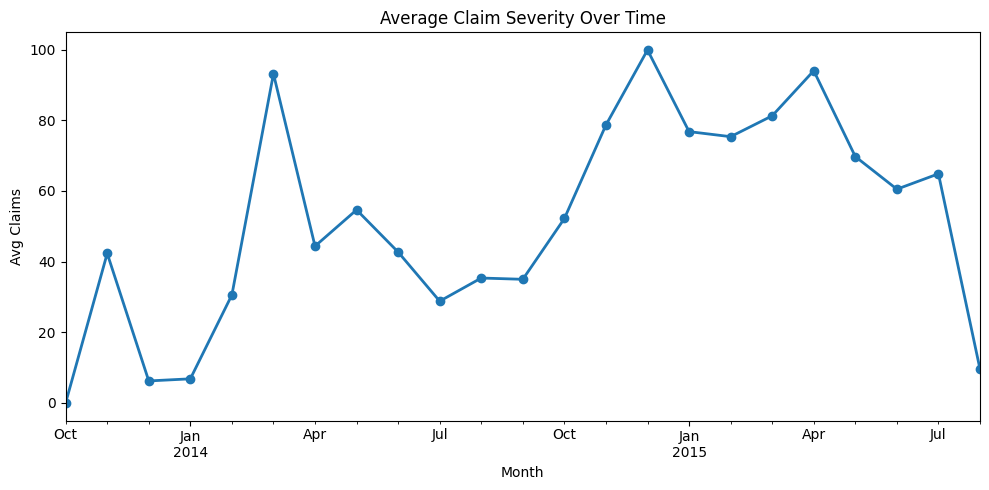

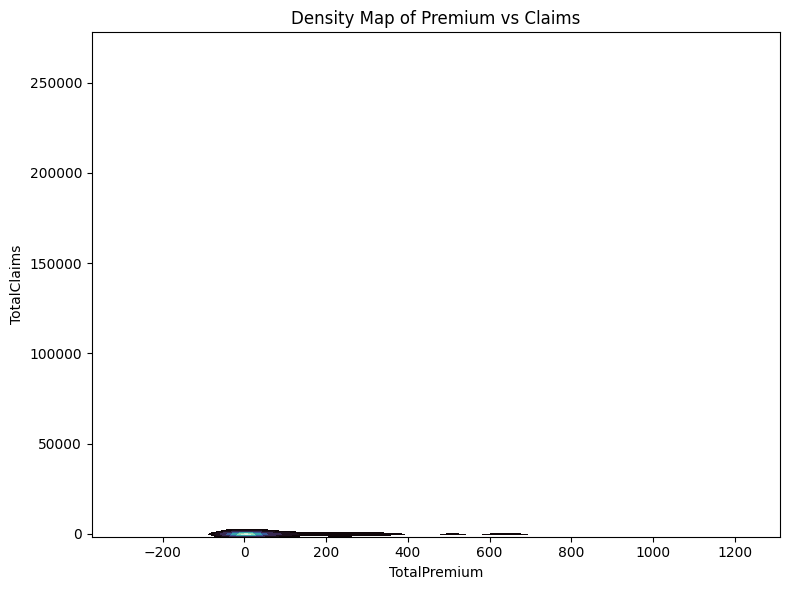

EDA Completed Successfully 🌿✨


In [20]:
# ============================================================
# 10. CREATIVE INSIGHT PLOTS (3 BEAUTIFUL PLOTS)
# ============================================================

import numpy as np

# Plot 1: Loss Ratio Heatmap by Province & VehicleType
pivot_heatmap = df.pivot_table(
    values="LossRatio",
    index="Province",
    columns="VehicleType",
    aggfunc="mean"
)

plt.figure(figsize=(12,6))
sns.heatmap(pivot_heatmap, annot=False, cmap="YlGnBu")
plt.title("Loss Ratio Landscape Across Provinces & Vehicle Types")
plt.tight_layout()
plt.show()

# Plot 2: Claims Severity Over Time
monthly_claims = df.groupby("Month")["TotalClaims"].mean()

plt.figure(figsize=(10,5))
monthly_claims.plot(marker="o", linewidth=2)
plt.title("Average Claim Severity Over Time")
plt.ylabel("Avg Claims")
plt.xlabel("Month")
plt.tight_layout()
plt.show()

# Plot 3: Premium vs Claims - Creative Density Plot
# Clean data: drop NaN/inf and sample to avoid KDE numerical issues
xy = df[["TotalPremium", "TotalClaims"]].replace([np.inf, -np.inf], np.nan).dropna()
if xy.empty:
    print("No valid data for Premium vs Claims density plot.")
else:
    # Optionally sample if dataset is large (speeds up KDE and avoids numerical issues)
    sample_n = min(len(xy), 20000)
    xy_sample = xy.sample(n=sample_n, random_state=42)

    # If one of the dimensions has zero variance, KDE will fail — fallback to scatter/hexbin
    tp_unique = xy_sample["TotalPremium"].nunique()
    tc_unique = xy_sample["TotalClaims"].nunique()

    plt.figure(figsize=(8,6))
    try:
        if tp_unique <= 1 or tc_unique <= 1:
            # Not enough variation for contour KDE
            sns.scatterplot(data=xy_sample, x="TotalPremium", y="TotalClaims", alpha=0.4)
            plt.title("Premium vs Claims (scatter) - insufficient variation for KDE")
        else:
            # Use explicit levels and a try/except to handle any KDE contour issues
            sns.kdeplot(
                x=xy_sample["TotalPremium"],
                y=xy_sample["TotalClaims"],
                fill=True,
                levels=10,        # explicit increasing number of contour levels
                thresh=0.05,
                cmap="mako",
                bw_method="scott"  # stable bandwidth estimator
            )
            plt.title("Density Map of Premium vs Claims")
    except ValueError:
        # Fallback if seaborn raises contour-related errors
        sns.histplot(data=xy_sample, x="TotalPremium", y="TotalClaims", bins=50, pmax=0.9, cmap="mako")
        plt.title("Premium vs Claims (2D histogram fallback)")

    plt.tight_layout()
    plt.show()

print("EDA Completed Successfully 🌿✨")